<a href="https://colab.research.google.com/github/venusbais/TEXT-GENERATION-GPT_2-/blob/main/Text_Generation_in_(GPT_2)VB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Generation in (GPT-2)**



**Text Generation in GPT-2: Technical and Mathematical Overview**

1. **Transformer Architecture**


*   Self-Attention: Allows the model to focus on different parts of the input when generating text.
*   Layers: GPT-2 uses only the decoder part of the Transformer, stacked multiple times (e.g., 12 layers in GPT-2 small).



2. **Tokenization**



*   Byte Pair Encoding (BPE): Converts raw text into subword tokens.
𝑆
→
𝑇
=
(
𝑡
1
,
𝑡
2
,
…
,
𝑡
𝑛
)
S→T=(t
1
​
 ,t
2
​
 ,…,t
n
​
 )



3. **Input Embedding**


*   Converts tokens into high-dimensional vectors.
*   Positional Encoding: Adds sequence order information using sinusoidal functions.X
i
​
 =E(t
i
​
 )+P(pos
i
​
 )





4. **Self-Attention Mechanism**


*   Query (Q), Key (K), Value (V) vectors calculated for each token.
*   Scaled Dot-Product Attention:
Attention
(
𝑄
,
𝐾
,
𝑉
)
=
softmax
(
𝑄
𝐾
𝑇
𝑑
𝑘
)
𝑉
Attention(Q,K,V)=softmax(
d
k
​QK
T
​
 )V





5. **Feed-Forward Neural Network**


*   Each token’s representation is refined through a two-layer FFN with ReLU activation.
𝐹
𝐹
𝑁
(
𝑥
)
=
ReLU
(
𝑥
𝑊
1
+
𝑏
1
)
𝑊
2
+
𝑏
2
FFN(x)=ReLU(xW
1
​
 +b
1
​
 )W
2
​
 +b
2
​






6. **Text Generation (Decoding)**

*   Predicts the next token using the final layer’s output and a softmax function.
𝑃
(
𝑡
𝑖
+
1
∣
𝑡
1
,
𝑡
2
,
…
,
𝑡
𝑖
)
=
softmax
(
𝑊
𝑜
ℎ
𝑖
)
P(t
i+1
​
 ∣t
1
​
 ,t
2
​
 ,…,t
i
​
 )=softmax(W
o
​
 h
i
​
 )
*   Beam Search: Improves text quality by exploring multiple sequences.




7. **Loss Function and Training**

*   Uses cross-entropy loss to train the model by comparing predicted probabilities with actual tokens.
Loss
=
−
∑
𝑖
=
1
𝑁
log
⁡
𝑃
(
𝑡
𝑖
∣
𝑡
1
,
𝑡
2
,
…
,
𝑡
𝑖
−
1
)
Loss=−∑
i=1
N
​
 logP(t
i
​
 ∣t
1
​
 ,t
2
​
 ,…,t
i−1
​
 )





**Example Process**

1.Tokenize the initial sentence.
2.Embed tokens and add positional encodings.
3.Use self-attention to consider context.
4.Pass through stacked layers.
5.Predict the next token and repeat to generate text.




-----------------------------------------------------------------------------------
*   This command installs the required Python libraries.
*   *transformers* is used for working with transformer models.
*   *matplotlib* is used for plotting and visualizing data.
*   *nltk* is the Natural Language Toolkit, used for natural language processing tasks.








In [1]:
!pip install transformers
!pip install matplotlib
!pip install nltk


----------------------------------------------------------------------------------------------------------------------------------
*   Import necessary modules from the installed libraries.

*   *torch* is the PyTorch library for tensor computations.

*   *GPT2Tokenizer*  and *GPT2LMHeadModel* are classes from the transformers library for tokenizing text and loading the GPT-2 model.

*  *matplotlib.pyplot* is used for creating plots.

*   *nltk* is imported to download necessary data.
*   *SentimentIntensityAnalyzer* from NLTK is used for performing sentiment analysis on text.












In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

-------------------------------------------------------------------------------------


*   This command downloads the VADER sentiment analysis lexicon, which is required for the sentiment analysis task.



In [3]:
# Download NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# **1. Convert the sentences into the tokens**


----------------------------------------------------------------------------------
*   Initializes the GPT-2 tokenizer and model using the *gpt2-large* pre-trained model from the Hugging Face library.
*   *pad_token_id* is set to the end-of-sequence token to handle padding during text generation.



In [4]:
# Initialize the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-large')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

In [5]:
model = GPT2LMHeadModel.from_pretrained('gpt2-large', pad_token_id=tokenizer.eos_token_id)


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [6]:
tokenizer.eos_token_id


50256

In [7]:
tokenizer.decode(tokenizer.eos_token_id)


'<|endoftext|>'


----------------------------------------------------------------------------------
*   Defines a list of sentences that will be used as input for text generation.
*  These sentences cover various topics and serve as starting points for the model to generate extended text.



In [8]:
sentences = [
    'Artificial Intelligence is transforming healthcare with predictive analytics, enabling early disease detection and personalized treatment plans.',
    'Climate change is a pressing issue that requires immediate global action to mitigate its effects.',
    'The rise of renewable energy sources is crucial for a sustainable future.',
    'Advancements in technology are reshaping the landscape of education, making learning more accessible.'
]

#OR

# sentence = input("Enter a sentence to generate text: ")

---------------------------------------------------------------------

*   Loops through each sentence in the list and prints it.
*   This helps to keep track of which input sentence is being processed.



In [9]:
for sentence in sentences:
    print(f"Input Sentence: {sentence}")

Input Sentence: Artificial Intelligence is transforming healthcare with predictive analytics, enabling early disease detection and personalized treatment plans.
Input Sentence: Climate change is a pressing issue that requires immediate global action to mitigate its effects.
Input Sentence: The rise of renewable energy sources is crucial for a sustainable future.
Input Sentence: Advancements in technology are reshaping the landscape of education, making learning more accessible.




*  Converts each sentence into a list of numeric token IDs using the GPT-2 tokenizer.
*   *return_tensors='pt'* specifies that the output should be a PyTorch tensor.



In [10]:
numeric_ids = tokenizer.encode(sentence, return_tensors='pt')

In [11]:
numeric_ids

tensor([[ 2782, 19259,   902,   287,  3037,   389, 27179,  9269,   262, 10747,
           286,  3707,    11,  1642,  4673,   517,  9857,    13]])

In [12]:
tokenizer.decode(numeric_ids[0][10])

' of'

# 2. **Generates text based on the input sentence using the GPT-2 model**

------------------------------------------------------------------------------------

*   max_length=100: Limits the maximum length of the generated text to 100 tokens.

*   num_beams=5: Uses beam search with 5 beams to generate more diverse text.

*  no_repeat_ngram_size=2: Prevents repetition of 2-gram sequences in the generated text.

*   early_stopping=True: Stops generation once the model predicts an end-of-sequence token.
*   temperature=0.7: Controls the randomness of predictions by scaling logits before applying softmax.


*   top_k=50: Considers only the top 50 tokens with the highest probability at each step.


*   top_p=0.95: Uses nucleus sampling, selecting the smallest set of tokens with a cumulative probability above 95%.






In [13]:
result = model.generate(
        numeric_ids,
        max_length=100,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True,
        temperature=0.7,
        top_k=50,
        top_p=0.95
    )

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [14]:
result

tensor([[ 2782, 19259,   902,   287,  3037,   389, 27179,  9269,   262, 10747,
           286,  3707,    11,  1642,  4673,   517,  9857,    13,   198,   198,
           818,   262,  1613,  5707,    11,   262,  1271,   286,  2444, 18724,
           287,  4152,   468,  3220,   416,   517,   621,  2026,  1411,    11,
          1864,   284,   262,   471,    13,    50,    13,  2732,   286,  7868,
            13,   554,   262,   976,   640,  2278,    11, 20753,   287,  2440,
          3707,   287,   262,  1578,  1829,   468,  3016, 15229,    11,   422,
           352,    13,    19,  1510,  2444,   287,  4751,   284,   362,    13,
            17,  1510,   287,  3050,    13,   383,  1271,   318,  2938,   284,
          3151,   513,    13,    20,  1510,   416, 12131,    11,   290,   262]])

--------------------------------------------------------------------------


*   Converts the list of token IDs in the generated text back into human-readable text.

*   *skip_special_tokens=True* ensures that special tokens are removed from the final output.


*   Prints the generated text to the console.






In [15]:
generated_text = tokenizer.decode(result[0], skip_special_tokens=True)
print("Generated Text:\n", generated_text)

Generated Text:
 Advancements in technology are reshaping the landscape of education, making learning more accessible.

In the past decade, the number of students enrolled in college has increased by more than 50 percent, according to the U.S. Department of Education. In the same time period, enrollment in higher education in the United States has nearly doubled, from 1.4 million students in 2000 to 2.2 million in 2010. The number is expected to reach 3.5 million by 2020, and the



-------------------------------------------------------------------------


*   Initializes the Sentiment Intensity Analyzer from NLTK.

*   Analyzes the sentiment of the generated text, providing a dictionary with scores for positive, neutral, negative, and compound sentiments.



Prints the sentiment analysis results to the console.



In [16]:
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(generated_text)
print("\nSentiment Analysis:", sentiment)


Sentiment Analysis: {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.6808}


----------------------------------------------------------------


*   Prepares data for visualization, creating a bar chart where the x-axis represents the tokens and the y-axis represents their numeric IDs.

*   Configures the plot with labels, title, and rotates the x-axis labels for better readability.


*   Displays the plot showing the tokenized sentence.







In [17]:
tokens = tokenizer.convert_ids_to_tokens(numeric_ids[0])
token_ids = numeric_ids[0].tolist()

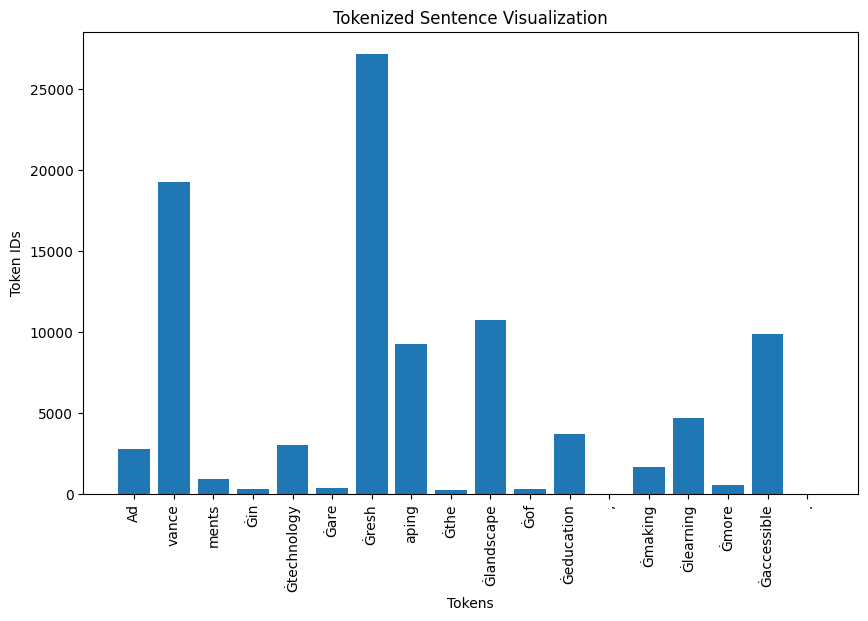

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(tokens, token_ids)
plt.xlabel('Tokens')
plt.ylabel('Token IDs')
plt.title('Tokenized Sentence Visualization')
plt.xticks(rotation=90)
plt.show()